In [1]:
# Importing Necessary Libraries
import cv2
import os
import shutil 
import math
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import cv2

# Function for Formatting Dataset
def FormatDataset(dataset_src, dataset_dest, classes):
    # Making destination folders for each class and type (CROPPED and COMPLETE)
    new_cropped_dest = [os.path.join(dataset_dest, cls, 'CROPPED') for cls in classes]
    new_complete_dest = [os.path.join(dataset_dest, cls, 'COMPLETE') for cls in classes]
    
    cropped_src = [os.path.join(dataset_src, f"im_{cls}", "im_" + cls, "CROPPED") for cls in classes]
    complete_src = [os.path.join(dataset_src, f"im_{cls}", "im_" + cls) for cls in classes]
    
    # Creating necessary directories only if they don't already exist
    for dest1, dest2 in zip(new_cropped_dest, new_complete_dest):
        if not os.path.isdir(dest1):
            os.makedirs(dest1, exist_ok=True)
        if not os.path.isdir(dest2):
            os.makedirs(dest2, exist_ok=True)
    
    # Formatting Cropped Images
    for src, new_dest in zip(cropped_src, new_cropped_dest):
        if os.path.exists(src):
            for file in os.listdir(src):
                filename, file_ext = os.path.splitext(file)
                if file_ext.lower() == '.bmp':
                    img_des = os.path.join(new_dest, filename + '.jpg')
                    img = cv2.imread(os.path.join(src, file))
                    if img is not None:
                        img = cv2.resize(img, (64, 64))
                        img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
                        img = cv2.blur(img, (2, 2))
                        cv2.imwrite(img_des, img)
    
    # Formatting Complete Images
    for src, new_dest in zip(complete_src, new_complete_dest):
        if os.path.exists(src):
            for file in os.listdir(src):
                filename, file_ext = os.path.splitext(file)
                if file_ext.lower() == '.bmp':
                    img_des = os.path.join(new_dest, filename + '.jpg')
                    img = cv2.imread(os.path.join(src, file))
                    if img is not None:
                        img = cv2.resize(img, (256, 256))
                        img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0)
                        img = cv2.blur(img, (2, 2))
                        cv2.imwrite(img_des, img)

# Source Location for Dataset
src = 'D:/DeepLearning/test/input/cervical-cancer-largest-dataset-sipakmed'
# Destination Location for Dataset
dest = 'D:/DeepLearning/test/CervicalCancer'
# Image Classes
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]

# Formatting Dataset
FormatDataset(src, dest, classes)


In [3]:
root_dir = "D:/DeepLearning/test/CervicalCancer"
classes = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"]

def GetDatasetSize(path, classes, main = "CROPPED"):
    num_of_image = {}
    for cls in classes:
        # Counting the Number of Files in the Folder
        num_of_image[cls] = len(os.listdir(os.path.join(path, cls, main)));
    return num_of_image;

print(GetDatasetSize(root_dir, classes, "COMPLETE"));

{'Dyskeratotic': 223, 'Koilocytotic': 238, 'Metaplastic': 271, 'Parabasal': 108, 'Superficial-Intermediate': 126}


### Split the Dataset such that we have
* 70% for Train Data
* 15% for Validation Data
* 15% for Testing Data

In [4]:
import os
import numpy as np
import shutil

# Function for Creating Train / Validation / Test folders (One time use Only)
def TrainValTestSplit(root_dir, classes_dir, main="CROPPED", val_ratio=0.15, test_ratio=0.15):
    # Base directories for train, val, and test splits
    train_base_dir = 'train'
    val_base_dir = 'val'
    test_base_dir = 'test'
    
    # Creating base folders if they don't already exist
    os.makedirs(train_base_dir, exist_ok=True)
    os.makedirs(val_base_dir, exist_ok=True)
    os.makedirs(test_base_dir, exist_ok=True)

    for cls in classes_dir:
        # Creating Split Folders for each class
        os.makedirs(os.path.join(train_base_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(val_base_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(test_base_dir, cls), exist_ok=True)

        # Folder to copy images from
        src = os.path.join(root_dir, cls, main)

        # Splitting the Files in the Given ratio
        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(
            np.array(allFileNames), 
            [int(len(allFileNames) * (1 - (val_ratio + test_ratio))), 
             int(len(allFileNames) * (1 - test_ratio))]
        )

        train_FileNames = [os.path.join(src, name) for name in train_FileNames.tolist()]
        val_FileNames = [os.path.join(src, name) for name in val_FileNames.tolist()]
        test_FileNames = [os.path.join(src, name) for name in test_FileNames.tolist()]

        # Printing the Split Details
        print(cls, ':')
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, os.path.join(train_base_dir, cls))

        for name in val_FileNames:
            shutil.copy(name, os.path.join(val_base_dir, cls))

        for name in test_FileNames:
            shutil.copy(name, os.path.join(test_base_dir, cls))
        print()

# Performing Train / Validation / Test Split
root_dir = "./CervicalCancer"  # Dataset Root Folder
classes_dir = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]  # Classes
TrainValTestSplit(root_dir, classes_dir)


Dyskeratotic :
Total images:  813
Training:  569
Validation:  122
Testing:  122

Koilocytotic :
Total images:  825
Training:  577
Validation:  124
Testing:  124

Metaplastic :
Total images:  793
Training:  555
Validation:  119
Testing:  119

Parabasal :
Total images:  787
Training:  550
Validation:  118
Testing:  119

Superficial-Intermediate :
Total images:  831
Training:  581
Validation:  125
Testing:  125



### Building Model 


In [5]:
# Importing Keras for Image Classification
import keras
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [6]:
# CNN Model 

model = Sequential() 
# Convolutional Layer with input shape (64,64,3)
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(64,64,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=5, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)     

In [7]:
model = Sequential()

# Convolutional Layer with input shape (64,64,3)
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=5, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to calculate number of computations for a layer
def compute_params_ops(layer):
    params = 0
    ops = 0
    try:
        params = layer.count_params()
        ops = params
        if layer.input_shape and len(layer.input_shape) == 4:
            ops *= layer.input_shape[1] * layer.input_shape[2]
    except Exception as e:
        print(f"An exception occurred for layer {layer}: {str(e)}")
    return params, ops

total_params, total_ops = 0, 0

for layer in model.layers:
    params, ops = compute_params_ops(layer)
    total_params += params
    total_ops += ops

print(f"Total number of parameters: {total_params}")
print(f"Total number of computations: {total_ops}")
model.summary()

Total number of parameters: 392741
Total number of computations: 51088645
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                              

### Preparing data using data generator 

In [8]:
# Expand the size of dataset with new transformed images from the original dataset using ImageDataGenerator.
train_datagen = image.ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True)
val_datagen = image.ImageDataGenerator(rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [9]:
train_data = train_datagen.flow_from_directory(directory= "D:/DeepLearning/test/train", target_size=(64, 64), batch_size=100, class_mode = 'categorical')

Found 4035 images belonging to 5 classes.


In [10]:
train_data.class_indices

{'Dyskeratotic': 0,
 'Koilocytotic': 1,
 'Metaplastic': 2,
 'Parabasal': 3,
 'Superficial-Intermediate': 4}

In [11]:
val_data = val_datagen.flow_from_directory(directory= "D:/DeepLearning/test/val", target_size=(64, 64), batch_size=100, class_mode = 'categorical')

Found 2239 images belonging to 5 classes.


In [12]:
test_data = test_datagen.flow_from_directory(directory= "D:/DeepLearning/test/test", target_size=(64, 64), batch_size=100, class_mode = 'categorical')

Found 2264 images belonging to 5 classes.


In [13]:
# Adding Model check point Callback
mc = ModelCheckpoint(filepath="cervical_cancer_best_model.hdf5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto');
call_back = [ mc ];

In [14]:
# Fitting the Model
cnn = model.fit(train_data, 
                  steps_per_epoch= 28, 
                  epochs= 32,
                  validation_data= val_data, 
                  validation_steps= 6,
                  callbacks = call_back )

Epoch 1/32


28/28 [==============================] - ETA: 0s - loss: 1.2730 - accuracy: 0.4475
Epoch 1: val_accuracy improved from -inf to 0.63000, saving model to cervical_cancer_best_model.hdf5
28/28 [==============================] - 30s 887ms/step - loss: 1.2730 - accuracy: 0.4475 - val_loss: 1.0181 - val_accuracy: 0.6300
Epoch 2/32
28/28 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.6062
Epoch 2: val_accuracy improved from 0.63000 to 0.68167, saving model to cervical_cancer_best_model.hdf5
28/28 [==============================] - 12s 439ms/step - loss: 1.0217 - accuracy: 0.6062 - val_loss: 0.8792 - val_accuracy: 0.6817
Epoch 3/32
28/28 [==============================] - ETA: 0s - loss: 0.8987 - accuracy: 0.6728
Epoch 3: val_accuracy improved from 0.68167 to 0.70667, saving model to cervical_cancer_best_model.hdf5
28/28 [==============================] - 8s 303ms/step - loss: 0.8987 - accuracy: 0.6728 - val_loss: 0.8057 - val_accuracy: 0.7067
Epoch 4/32
2

In [15]:
# Loading the Best Fit Model 
model = load_model("./cervical_cancer_best_model.hdf5")

### Model Accuracy

In [16]:
# Checking the Accuracy of the Model 
accuracy = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of your model is = {accuracy*100} %")

The accuracy of your model is = 93.33038926124573 %


In [17]:
h =  cnn.history;
h.keys();

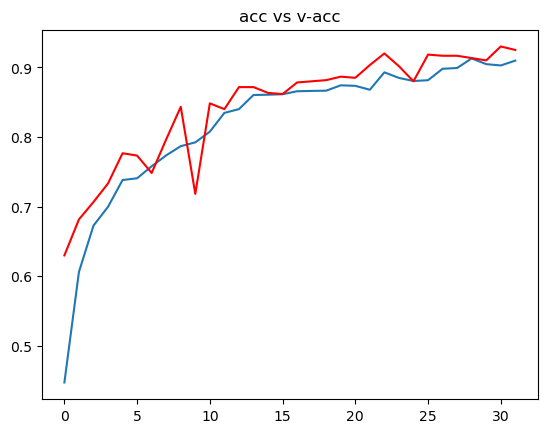

In [18]:
# Ploting Accuracy In Training Set & Validation Set

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

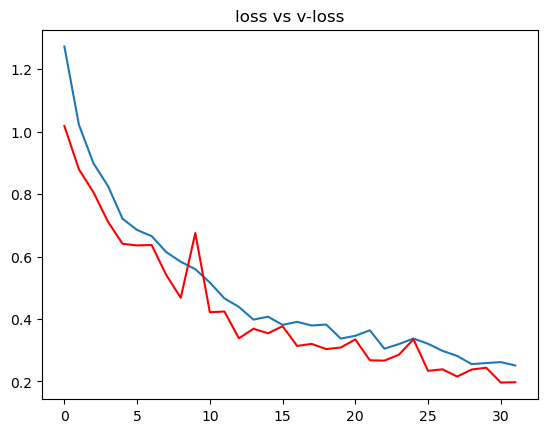

In [19]:
# Ploting Loss In Training Set & Validation Set

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

23/23 [==============================] - 1s 44ms/step


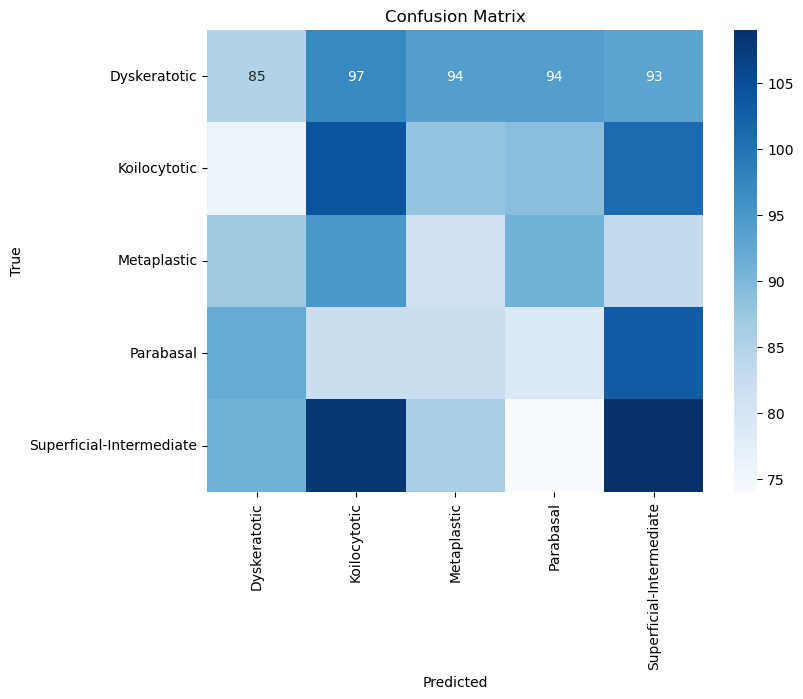

Accuracy: 20.23%
                          precision    recall  f1-score   support

            Dyskeratotic       0.20      0.18      0.19       463
            Koilocytotic       0.21      0.23      0.22       458
             Metaplastic       0.19      0.19      0.19       437
               Parabasal       0.19      0.18      0.18       438
Superficial-Intermediate       0.22      0.23      0.23       468

                accuracy                           0.20      2264
               macro avg       0.20      0.20      0.20      2264
            weighted avg       0.20      0.20      0.20      2264



In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Generate predictions for the test dataset
y_pred = model.predict(test_data)

# Convert the one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels from the test dataset generator
y_true = test_data.classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate classification report to calculate precision, recall, and F1-score
class_report = classification_report(y_true, y_pred_classes, target_names=classes)
print(class_report)